In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from string import punctuation
import re
from global_values import *


# 文本数据处理

In [7]:
train_data = pd.read_csv(data_dir+'train_split_Depression_AVEC2017.csv')
dev_data = pd.read_csv(data_dir+'dev_split_Depression_AVEC2017.csv')
test_data = pd.read_csv(data_dir+'full_test_split.csv')

In [8]:
test_data.rename(columns = {"PHQ_Binary":"PHQ8_Binary"},inplace=True)

In [9]:
print(train_data.columns,end='\n')
print(dev_data.columns,end='\n')
print(test_data.columns,end='\n')
labels = pd.concat([train_data[['Participant_ID','PHQ8_Binary']],dev_data[['Participant_ID','PHQ8_Binary']],\
           test_data[['Participant_ID','PHQ8_Binary']]],axis=0)
labels.sort_values(by="Participant_ID")
labels.head()

Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ_Score', 'Gender'], dtype='object')


,Participant_ID,PHQ8_Binary
0,303,0
1,304,0
2,305,0
3,310,0
4,312,0


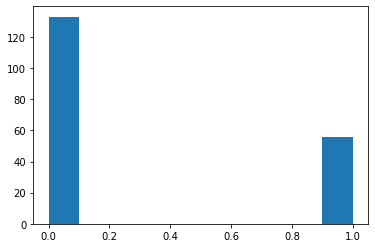

In [10]:
plt.hist(labels['PHQ8_Binary'])
plt.show()

In [11]:
text_files = [file for file in os.listdir(text_dir) if file.endswith('.csv')]
text_files[:5]
assert len(text_files)==189

In [12]:
text_files.sort()
PREFIX = [file[:3] for file in text_files]
text_files[:5]

['300_TRANSCRIPT.csv',
 '301_TRANSCRIPT.csv',
 '302_TRANSCRIPT.csv',
 '303_TRANSCRIPT.csv',
 '304_TRANSCRIPT.csv']

In [13]:
text_300 = pd.read_csv(text_dir+text_files[0],sep='\t')
text_300.head()

,start_time,stop_time,speaker,value
0,36.588,39.668,Ellie,hi i'm ellie thanks for coming in today
1,39.888,43.378,Ellie,i was created to talk to people in a safe and ...
2,43.728,48.498,Ellie,think of me as a friend i don't judge i can't ...
3,49.188,52.388,Ellie,i'm here to learn about people and would love ...
4,52.658,58.958,Ellie,i'll ask a few questions to get us started and...


In [14]:
". ".join(text_300[text_300['speaker']=="Participant"].value.tolist())

"good. atlanta georgia. um my parents are from here um. i love it. i like the weather. i like the opportunities. um. yes. um. it took a minute. somewhat easy. congestion. that's it. um i took up business and administration. uh yeah i am. here and there i'm on a break right now but i plan on going back in the uh next semester. uh probably to open up my own business. no. um no specific reason i just. don't travel a lot. i'm pretty local. once a year. can you be a little bit more specific. no answer. i like reading books i enjoy i enjoy cooking. um exercising is great. i'm i'm i'm pretty good at it. um. yeah. um probably about. two weeks ago. uh frustrated. um. i don't like bias. um i don't like um when someone says they're gonna do something and they don't. uh somewhat. friendship. i like to play sports i enjoy uh going out with friends and family. playing games. grandparents. parents. um yeah i mean they've always given me great advice. they've always kept it real. real close. i would s

In [15]:
with open(text_dir+'docs.txt','w') as f:
    for file in text_files:
        text = pd.read_csv(text_dir+file,sep='\t')
        if np.any(text.value.isnull()):
            text.value.fillna("",inplace=True)
        try:
            text = ". ".join(text[text['speaker']=="Participant"].value.tolist())
            f.write(text)
            f.write('\n')
        except:
            print(file)

In [4]:
with open(TEXT_DIR+"docs.txt",'r') as f:
    docs = "".join(f.readlines()).split('\n')
    docs = docs[:-1]
assert len(docs)==189

In [17]:
with open(text_dir+"labels.txt",'w') as f:
    for label in labels.PHQ8_Binary.tolist():
        f.write(str(label))
        f.write('\n')


In [5]:
with open(TEXT_DIR+"labels.txt",'r') as f:
    labels = "".join(f.readlines()).split('\n')
    labels = labels[:-1]
assert len(labels)==189

In [86]:
def Process_text(text):
    """预处理文本:
    - 分词
    - 去特殊符号
    """
    pattern = r"[!\"#$%&'()*+,-./:;<=>?@\[\]\\^_`{|}~]"
    text = re.sub(pattern,"",text)
    return text

In [87]:
with open(TEXT_DIR+'process_docs.txt','w') as f:
    for doc in docs:
        f.write(Process_text(doc))
        f.write('\n')

In [10]:
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from core.model.EmbeddingAverage import EmbedAvg
from collections import Counter
model = EmbedAvg(25000,100,1,0.5)

In [9]:
with open(TEXT_DIR+'process_docs.txt','r') as f:
    docs = "".join(f.readlines()).split('\n')
docs[0]

'good atlanta georgia um my parents are from here um i love it i like the weather i like the opportunities um yes um it took a minute somewhat easy congestion thats it um i took up business and administration uh yeah i am here and there im on a break right now but i plan on going back in the uh next semester uh probably to open up my own business no um no specific reason i just dont travel a lot im pretty local once a year can you be a little bit more specific no answer i like reading books i enjoy i enjoy cooking um exercising is great im im im pretty good at it um yeah um probably about two weeks ago uh frustrated um i dont like bias um i dont like um when someone says theyre gonna do something and they dont uh somewhat friendship i like to play sports i enjoy uh going out with friends and family playing games grandparents parents um yeah i mean theyve always given me great advice theyve always kept it real real close i would say going to college right after high school well i wouldv

In [12]:
words = [sentence.split() for sentence in docs]


In [16]:
allwords = Counter(" ".join(docs).split(' '))
len(allwords)

8611

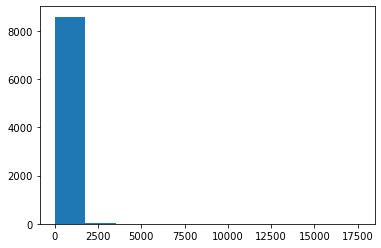

In [38]:
plt.hist(allwords.values())
plt.show()

In [50]:
allwords.most_common(8000)[-10:]

[('pitfalls', 1),
 ('drain', 1),
 ('awakeness', 1),
 ('hoover', 1),
 ('dam', 1),
 ('breathtaking', 1),
 ('stitch', 1),
 ('workload', 1),
 ('vocational', 1),
 ('des', 1)]

In [128]:
from core.model.WordAttention import WordAttention
from core.model.biLSTM_attention import BiLSTM_ATT
import torch.nn as nn
import torch
import torch.optim as optim
import torch.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, PackedSequence
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
import matplotlib.pyplot as plt
from global_values import *

sentences = torch.randint(0,20,(100,10)) # 100*10
labels = torch.randint(0,2,(100,)) #100*1
words_per_sentence = torch.randint(1,11,(100,))

val_sentences = torch.randint(0,20,(200,10))
val_labels = torch.randint(0,2,(200,))
val_words_per_sentence = torch.randint(1,11,(200,))

#model = WordAttention(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
model = BiLSTM_ATT(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.5)
model.to(device)

BiLSTM_ATT(
  (embedding): Embedding(20, 12)
  (lstm): LSTM(12, 10, num_layers=2, batch_first=True, bidirectional=True)
  (att): Linear(in_features=20, out_features=8, bias=True)
  (word_context_vector): Linear(in_features=8, out_features=1, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [137]:
temp_sentences = sentences
temp_labels = labels
temp_words = words_per_sentence

In [129]:
dataset = TensorDataset(sentences,words_per_sentence,labels)
train_data = DataLoader(dataset,batch_size=100,shuffle=True)

val_dataset = TensorDataset(val_sentences,val_words_per_sentence,val_labels)
val_data = DataLoader(val_dataset,batch_size=200,shuffle=True)

In [149]:
def acc_metrics(pre,y,threshold):
    pre = [0 if num<threshold else 1 for num in pre]
    #recall = recall_score(y,pre)
    #precision = precision_score(y,pre)
    #f1 = f1_score(y,pre)
    #accuracy = accuracy_score(y,pre)
    #metrics = [recall,precision,f1,accuracy]
    #return [round(metric,3) for metric in metrics] 
    cnt = 0
    positive = 0
    true_positive = 0
    pre_positive = 0
    for i in range(len(pre)):
        if pre[i]==y[i]:
            cnt+=1
        if y[i]==1:
            positive+=1
        if y[i]==1 and pre[i]==1:
            true_positive+=1
        if pre[i]==1:
            pre_positive+=1
            
    return cnt,len(pre),true_positive,positive,pre_positive

def Train(epoch,train_data,val_data):
    Loss = 0
    cnts = 0
    totals = 0
    true_positives = 0 
    positives = 0
    pre_positives = 0
    for i,(sentences,words_per_sentence,labels) in enumerate(train_data):
        model.train()
        sentences = sentences.to(device)
        words_per_sentence = words_per_sentence.to(device)
        labels = labels.to(device)
        pre = model(sentences,words_per_sentence)
        
        cnt,total,true_positive,positive,pre_positive = acc_metrics(pre.squeeze(),labels.float(),threshold=0.5)
        cnts+=cnt
        totals+= total
        true_positives+=true_positive
        positives+=positive
        pre_positives+=pre_positive
        
        loss = criterion(pre.squeeze(),labels.float())
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        optimizer.step()
        Loss+=loss.item()
        print("Training epoch: {} Loss: {:.5f} ACC: {:.2%} Recall: {:.2%} Precision: {:.2%}".format(epoch,Loss,cnts/totals,\
                                                                                                    true_positives/positives,\
                                                                                                    true_positives/pre_positives))   
        if i%100==0:
            val_loss = Evaluate(model,val_data)
            if len(val_losses)==0 or val_loss<min(val_losses):
                print("best model, Val loss:{:.5f}".format(val_loss))
                torch.save(model.state_dict(),"./result/biLSTM_att-best.th")
            else:
                scheduler.step()
            val_losses.append(val_loss)
            
            
def Evaluate(model,val_data):
    Loss = 0
    cnts = 0
    totals = 0
    true_positives = 0 
    positives = 0
    pre_positives = 0
    model.eval()
    with torch.no_grad():
        for i,(sentences,words_per_sentence,labels) in enumerate(val_data):
            sentences = sentences.to(device)
            words_per_sentence = words_per_sentence.to(device)
            labels = labels.to(device)
            pre = model(sentences,words_per_sentence)

            cnt,total,true_positive,positive,pre_positive = acc_metrics(pre.squeeze(),labels.float(),threshold=0.5)
            cnts+=cnt
            totals+= total
            true_positives+=true_positive
            positives+=positive
            pre_positives+=pre_positive
            loss = criterion(pre.squeeze(),labels.float())
            Loss+=loss.item()
        
        print("Validation epoch: {} Loss: {:.5f} ACC: {:.2%} Recall: {:.2%} Precision: {:.2%}".format(epoch,Loss,cnts/totals,\
                                                                                      true_positives/positives,\
                                                                                        true_positives/pre_positives))
    return Loss

In [150]:
val_losses = []
for epoch in range(100):
    Train(epoch,train_data,val_data)

Training epoch: 0 Loss: 0.00069 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 0 Loss: 5.32340 ACC: 48.00% Recall: 60.64% Precision: 45.97%
best model, Val loss:5.32340
Training epoch: 1 Loss: 0.00042 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 1 Loss: 5.32926 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 2 Loss: 0.00029 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 2 Loss: 5.33066 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 3 Loss: 0.00097 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 3 Loss: 5.33188 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 4 Loss: 0.00042 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 4 Loss: 5.33219 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 5 Loss: 0.00062 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 5 Loss: 5.33233 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 6

Training epoch: 53 Loss: 0.00052 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 53 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 54 Loss: 0.00047 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 54 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 55 Loss: 0.00151 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 55 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 56 Loss: 0.00090 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 56 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 57 Loss: 0.00092 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 57 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 58 Loss: 0.00023 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 58 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 59 Loss: 0.00066 A

In [134]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.01
    lr: 0.01
    weight_decay: 0
)

In [139]:
model.eval()
pre = model(temp_sentences,temp_words).squeeze()
pre = [1 if num>0.5 else 0 for num in pre]


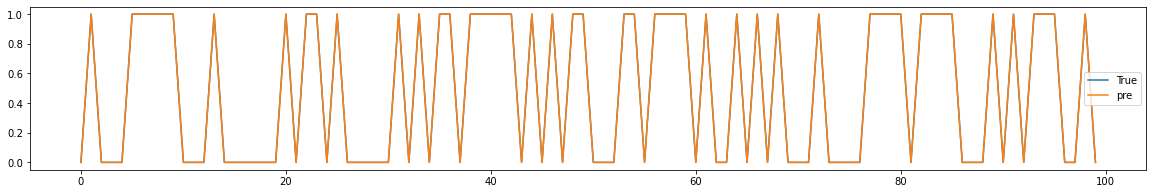

In [141]:
plt.figure(figsize=(20, 3))
plt.plot(range(100),temp_labels,label ="True")
plt.plot(range(100),pre,label ="pre")
plt.legend()
plt.show()

### 现存问题
- aus本身存在重复图片
- labels本身存在重复图片
- labels本身有重复值


In [92]:
aus = pd.read_csv('./face_model/data/aus.csv')
aus.drop(["Unnamed: 0"],axis=1,inplace=True)
aus.head()

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,afraid_African_214,0.975,1.38,1.04,0.00,2.66,0.99,1.30,1.32,0.80,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,afraid_African_960,0.975,0.70,1.10,0.00,1.57,0.00,0.65,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,afraid_African_960,0.925,0.61,1.20,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,afraid_american_190,0.975,0.51,0.33,0.42,0.00,0.00,0.00,0.00,0.18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,afraid_american_190,0.875,0.79,0.00,0.00,0.00,1.28,1.27,0.00,1.67,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [93]:
aus.shape

(181909, 37)

In [95]:
aus.drop_duplicates().shape

(181909, 37)

In [96]:
aus.face.drop_duplicates().shape

(78192,)

In [103]:
aus = aus.drop_duplicates(subset=['face'],keep=False)
aus.head()
#aus数据已经不存在重复值

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,afraid_African_214,0.975,1.38,1.04,0.00,2.66,0.99,1.30,1.32,0.80,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
5,afraid_american_238,0.975,1.97,2.07,0.00,1.55,1.16,0.54,0.04,2.12,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
14,afraid_asian_103,0.875,2.60,2.50,0.26,0.87,0.26,1.27,0.00,0.84,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
15,afraid_asian_153,0.875,1.00,2.88,0.00,2.40,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
16,afraid_asian_2,0.975,1.79,0.46,1.26,0.00,1.95,1.40,0.94,1.58,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [118]:
aus.shape

(42202, 37)

In [114]:
aus.face = [face+'.jpg' for face in aus.face]

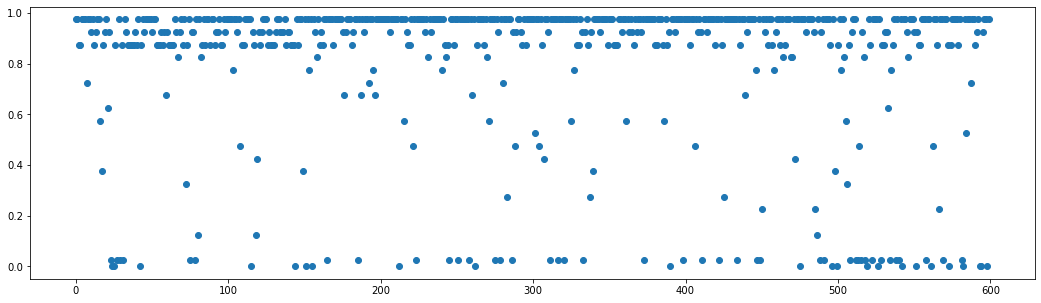

In [106]:
plt.figure(figsize=(18,5))
plt.scatter(range(aus.shape[0])[:600],aus[" confidence"][:600])
plt.show()

In [107]:
with open("./face_model/data/label.lst") as f:
    labels ="".join(f.readlines()).split('\n')
labels = [label.split(' ') for label in labels]
cols = ["face",'face_id_in_image','top','left','right','bottom','confidence','label']
labels = pd.DataFrame(labels,columns=cols)

In [108]:
labels.confidence = labels.confidence.astype('float')
labels.head()

,face,face_id_in_image,top,left,right,bottom,confidence,label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


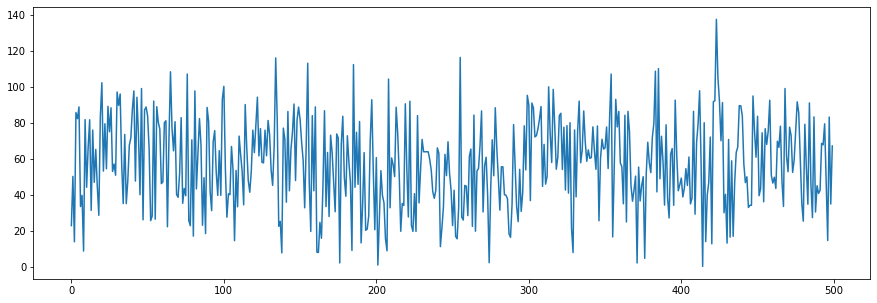

In [109]:
plt.figure(figsize=(15,5))
plt.plot(range(labels.shape[0])[:500],labels["confidence"][:500])
plt.show()

In [112]:
labels = labels.drop_duplicates(subset=['face'],keep=False)
labels.shape

(55649, 8)

In [124]:
data_used = labels.merge(aus,on='face')
data_used.head()
#data_used.shape

,face,face_id_in_image,top,left,right,bottom,confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0,0.875,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0,0.925,1.39,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_13.jpg,0,77,51,362,388,85.8104,3,0.975,0.85,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,angry_actor_132.jpg,0,95,31,412,476,82.3948,0,0.975,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,angry_actor_137.jpg,0,93,468,842,467,88.9519,0,0.975,0.64,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [123]:
data_used.label.value_counts()

6    11236
3     7752
4     4961
5     3870
0     2241
1     1674
2      621
Name: label, dtype: int64

In [130]:
data_used.confidence = data_used.confidence/100
data_used.top = data_used.top.astype('float')
data_used.left = data_used.left.astype('float')
data_used.right = data_used.right.astype('float')
data_used.bottom = data_used.bottom.astype('float')
data_used.label = data_used.label.astype('float')
data_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32355 entries, 0 to 32354
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   face              32355 non-null  object 
 1   face_id_in_image  32355 non-null  object 
 2   top               32355 non-null  float64
 3   left              32355 non-null  float64
 4   right             32355 non-null  float64
 5   bottom            32355 non-null  float64
 6   confidence        32355 non-null  float64
 7   label             32355 non-null  float64
 8    confidence       32355 non-null  float64
 9    AU01_r           32355 non-null  float64
 10   AU02_r           32355 non-null  float64
 11   AU04_r           32355 non-null  float64
 12   AU05_r           32355 non-null  float64
 13   AU06_r           32355 non-null  float64
 14   AU07_r           32355 non-null  float64
 15   AU09_r           32355 non-null  float64
 16   AU10_r           32355 non-null  float6

In [132]:
data_used.head()

,face,face_id_in_image,top,left,right,bottom,confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28.0,113.0,226.0,141.0,0.229362,0.0,0.875,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,0,31.0,157.0,345.0,219.0,0.503056,0.0,0.925,1.39,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_13.jpg,0,77.0,51.0,362.0,388.0,0.858104,3.0,0.975,0.85,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,angry_actor_132.jpg,0,95.0,31.0,412.0,476.0,0.823948,0.0,0.975,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,angry_actor_137.jpg,0,93.0,468.0,842.0,467.0,0.889519,0.0,0.975,0.64,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


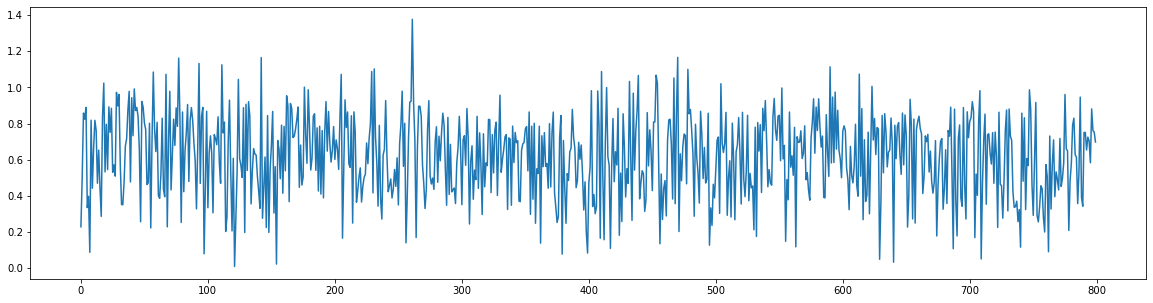

In [136]:
plt.figure(figsize=(20,5))
plt.plot(range(data_used.shape[0])[:800],data_used.confidence[:800])
plt.show()

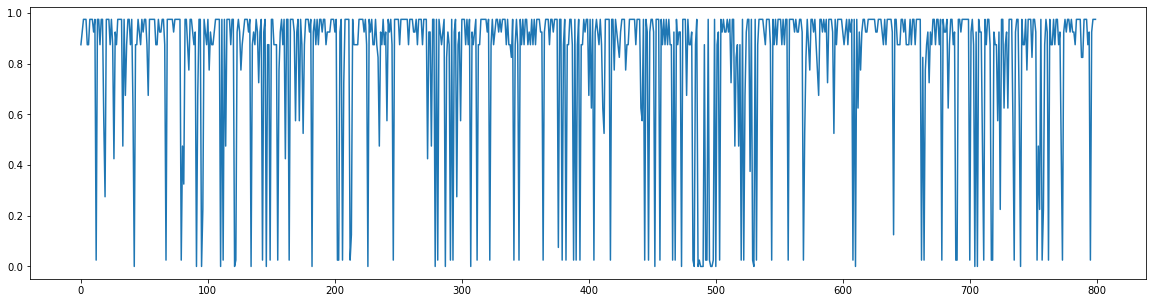

In [137]:
plt.figure(figsize=(20,5))
plt.plot(range(data_used.shape[0])[:800],data_used[' confidence'][:800])
plt.show()

In [143]:
data_used.rename(columns={'confidence':'face_confidence',' confidence':'confidence'},inplace=True)

data_used.head()

,face,face_id_in_image,top,left,right,bottom,confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28.0,113.0,226.0,141.0,0.229362,0.0,0.875,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,0,31.0,157.0,345.0,219.0,0.503056,0.0,0.925,1.39,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_13.jpg,0,77.0,51.0,362.0,388.0,0.858104,3.0,0.975,0.85,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,angry_actor_132.jpg,0,95.0,31.0,412.0,476.0,0.823948,0.0,0.975,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,angry_actor_137.jpg,0,93.0,468.0,842.0,467.0,0.889519,0.0,0.975,0.64,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [149]:
data_used.to_csv('./face_model/data/data.csv')

In [2]:
ovr_data = pd.read_csv('./face_model/data/ovr_data.csv')
ovr_data.head()

,face,face_id_in_image,top,left,right,bottom,face_confidence,label,confidence,AU01_r,...,AU26_c,AU28_c,AU45_c,angry,happy,neutral,sad,disgust,surprise,fear
0,angry_actor_104.jpg,0,28,113,226,141,0.229362,0,0.875,0.00,...,0,1,0,1,0,0,0,0,0,0
1,angry_actor_109.jpg,0,31,157,345,219,0.503056,0,0.925,1.39,...,0,0,0,1,0,0,0,0,0,0
2,angry_actor_13.jpg,0,77,51,362,388,0.858104,3,0.975,0.85,...,1,0,1,0,1,0,0,0,0,0
3,angry_actor_132.jpg,0,95,31,412,476,0.823948,0,0.975,0.00,...,0,1,1,1,0,0,0,0,0,0
4,angry_actor_137.jpg,0,93,468,842,467,0.889519,0,0.975,0.64,...,0,0,0,1,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

labels = ovr_data.label
data = ovr_data.drop(['label'],axis=1)

In [4]:
X_train,X_test, y_train, y_test = train_test_split(data,labels,test_size=0.3,stratify = labels)

In [6]:
print(X_train.shape,X_test.shape)

(22648, 50) (9707, 50)


In [7]:
y_train.value_counts()/sum(y_train.value_counts())

6    0.347271
3    0.239580
4    0.153303
5    0.119613
0    0.069278
1    0.051748
2    0.019207
Name: label, dtype: float64

In [8]:
y_test.value_counts()/sum(y_test.value_counts())

6    0.347275
3    0.239621
4    0.153394
5    0.119604
0    0.069228
1    0.051715
2    0.019161
Name: label, dtype: float64

In [10]:
y_train.value_counts()

6    7865
3    5426
4    3472
5    2709
0    1569
1    1172
2     435
Name: label, dtype: int64

In [12]:
X_train.head()

,face,face_id_in_image,top,left,right,bottom,face_confidence,confidence,AU01_r,AU02_r,...,AU26_c,AU28_c,AU45_c,angry,happy,neutral,sad,disgust,surprise,fear
13984,crying_asian_259.jpg,0,29,155,271,145,0.667432,0.975,1.01,0.00,...,0,0,0,0,0,0,1,0,0,0
31721,astound_expression_54.jpg,0,89,89,356,356,0.676698,0.975,1.95,3.68,...,1,1,0,0,0,0,0,0,1,0
23389,awe_actor_294.jpg,0,200,356,623,467,0.913680,0.975,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
8960,annoyed_grandfather_112.jpg,1,16,264,312,64,0.233749,0.975,0.48,0.15,...,0,0,0,0,0,1,0,0,0,0
31791,astound_programmer_231.jpg,0,16,67,134,83,0.758859,0.925,1.04,0.00,...,1,0,0,0,0,1,0,0,0,0


In [29]:
train_data = pd.concat([X_train,y_train],axis=1)
counts = sum(train_data.label ==6)
int(counts/6)

1310

In [61]:
from sklearn.utils import shuffle
from face_model.model_config import *
def generate(datasets,i):
    pos_data = train_data[train_data.label==i]
    neg_data = pd.DataFrame(data=None,columns=train_data.columns)
    counts = int(pos_data.shape[0]/6)
    k = 0
    while k<7:
        if k==i:
          pass  
        elif train_data[train_data.label==k].shape[0]<=counts:
            neg_data = pd.concat([neg_data,train_data[train_data.label==k]],axis=0)
        else:
            neg_data = pd.concat([neg_data,train_data[train_data.label==k].sample(counts,replace=False)],axis=0)
        print("class {} has been extracted!".format(k))
        k+=1
    return shuffle(pd.concat([pos_data,neg_data],axis=0))


In [62]:
train_class6 = generate(train_data,6)

class 0 has been extracted!
class 1 has been extracted!
class 2 has been extracted!
class 3 has been extracted!
class 4 has been extracted!
class 5 has been extracted!
class 6 has been extracted!


In [63]:
for i in range(7):
    data = generate(train_data,i)
    data.to_csv("./face_model/data/"+EXPRESSION_LABEL[str(i)]+"_ovr_data.csv",index= False)

class 0 has been extracted!
class 1 has been extracted!
class 2 has been extracted!
class 3 has been extracted!
class 4 has been extracted!
class 5 has been extracted!
class 6 has been extracted!
class 0 has been extracted!
class 1 has been extracted!
class 2 has been extracted!
class 3 has been extracted!
class 4 has been extracted!
class 5 has been extracted!
class 6 has been extracted!
class 0 has been extracted!
class 1 has been extracted!
class 2 has been extracted!
class 3 has been extracted!
class 4 has been extracted!
class 5 has been extracted!
class 6 has been extracted!
class 0 has been extracted!
class 1 has been extracted!
class 2 has been extracted!
class 3 has been extracted!
class 4 has been extracted!
class 5 has been extracted!
class 6 has been extracted!
class 0 has been extracted!
class 1 has been extracted!
class 2 has been extracted!
class 3 has been extracted!
class 4 has been extracted!
class 5 has been extracted!
class 6 has been extracted!
class 0 has been ext

In [57]:
data.head()

,face,face_id_in_image,top,left,right,bottom,face_confidence,confidence,AU01_r,AU02_r,...,AU28_c,AU45_c,angry,happy,neutral,sad,disgust,surprise,fear,label
24046,awe_father_333.jpg,0,226,226,770,770,0.250465,0.125,2.92,0.00,...,1,1,0,0,1,0,0,0,0,6
3309,fierce_face_329.jpg,0,422,172,402,652,0.403609,0.975,1.70,1.05,...,0,0,0,0,0,0,1,0,0,1
12604,boring_family_307.jpg,0,216,406,731,541,0.290813,0.875,0.71,0.00,...,1,1,0,0,0,0,1,0,0,1
17940,heartbroken_people_619.jpg,0,33,89,222,166,1.072660,0.975,1.57,0.66,...,0,1,0,0,0,0,1,0,0,1
16839,distressed_soldier_16.jpg,0,9,132,245,122,0.530854,0.875,2.26,0.10,...,1,0,0,0,1,0,0,0,0,6
